In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn import set_config
set_config(transform_output = 'pandas')

In [6]:
sacramento = pd.read_csv(r'C:\Users\m293w\Documents\Data Science\DSI Cert\LCR\01_materials\notebooks\dataset\sacramento.csv')

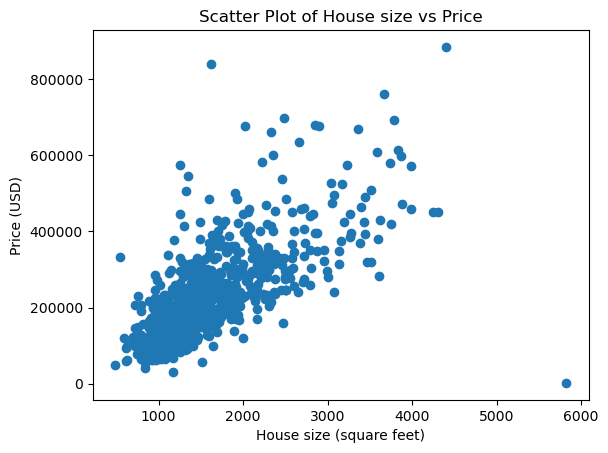

In [7]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [8]:
np.random.seed(123)

small_sacramento = sacramento.sample(n=30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
185,2610 PHYLLIS AVE,SACRAMENTO,95820,CA,2,1,804,Residential,Mon May 19 00:00:00 EDT 2008,120000,38.531050,-121.479574
210,294 SPARROW DR,GALT,95632,CA,4,3,2214,Residential,Fri May 16 00:00:00 EDT 2008,278000,38.258976,-121.321266
487,6000 BIRCHGLADE WAY,CITRUS HEIGHTS,95621,CA,4,2,1351,Residential,Mon May 19 00:00:00 EDT 2008,158000,38.701660,-121.323249
267,361 MAHONIA CIR,SACRAMENTO,95835,CA,4,3,2175,Residential,Mon May 19 00:00:00 EDT 2008,261000,38.676172,-121.509761
674,8164 CHENIN BLANC LN,FAIR OAKS,95628,CA,2,2,1315,Residential,Tue May 20 00:00:00 EDT 2008,230000,38.665644,-121.259969
177,251 CHANGO CIR,SACRAMENTO,95835,CA,4,2,2218,Residential,Mon May 19 00:00:00 EDT 2008,311328,38.682370,-121.539147
217,301 OLIVADI WAY,SACRAMENTO,95834,CA,2,2,1250,Condo,Mon May 19 00:00:00 EDT 2008,232500,38.644406,-121.549049
589,7204 THOMAS DR,NORTH HIGHLANDS,95660,CA,3,2,1152,Residential,Mon May 19 00:00:00 EDT 2008,158000,38.697898,-121.377687
696,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
602,7349 FLETCHER FARM DR,SACRAMENTO,95828,CA,4,2,1587,Residential,Mon May 19 00:00:00 EDT 2008,127500,38.490690,-121.382619


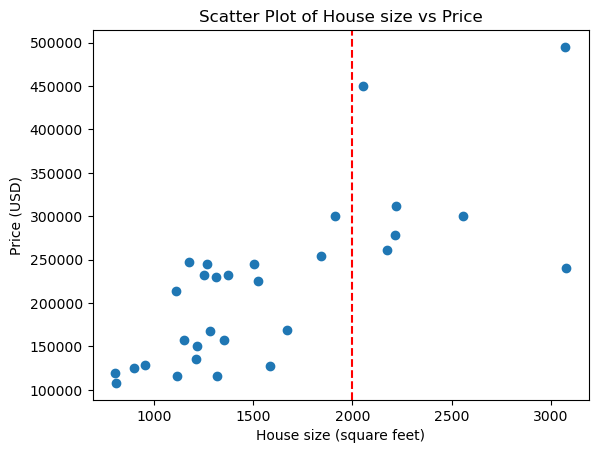

In [9]:
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [10]:
small_sacramento['dist'] = (2000 - small_sacramento['sq__ft']).abs()
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
185,2610 PHYLLIS AVE,SACRAMENTO,95820,CA,2,1,804,Residential,Mon May 19 00:00:00 EDT 2008,120000,38.531050,-121.479574,1196
210,294 SPARROW DR,GALT,95632,CA,4,3,2214,Residential,Fri May 16 00:00:00 EDT 2008,278000,38.258976,-121.321266,214
487,6000 BIRCHGLADE WAY,CITRUS HEIGHTS,95621,CA,4,2,1351,Residential,Mon May 19 00:00:00 EDT 2008,158000,38.701660,-121.323249,649
267,361 MAHONIA CIR,SACRAMENTO,95835,CA,4,3,2175,Residential,Mon May 19 00:00:00 EDT 2008,261000,38.676172,-121.509761,175
674,8164 CHENIN BLANC LN,FAIR OAKS,95628,CA,2,2,1315,Residential,Tue May 20 00:00:00 EDT 2008,230000,38.665644,-121.259969,685
177,251 CHANGO CIR,SACRAMENTO,95835,CA,4,2,2218,Residential,Mon May 19 00:00:00 EDT 2008,311328,38.682370,-121.539147,218
217,301 OLIVADI WAY,SACRAMENTO,95834,CA,2,2,1250,Condo,Mon May 19 00:00:00 EDT 2008,232500,38.644406,-121.549049,750
589,7204 THOMAS DR,NORTH HIGHLANDS,95660,CA,3,2,1152,Residential,Mon May 19 00:00:00 EDT 2008,158000,38.697898,-121.377687,848
696,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519,720
602,7349 FLETCHER FARM DR,SACRAMENTO,95828,CA,4,2,1587,Residential,Mon May 19 00:00:00 EDT 2008,127500,38.490690,-121.382619,413


In [13]:
nearest_neighbors = small_sacramento.nsmallest(5, 'dist')
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
227,3108 DELWOOD WAY,SACRAMENTO,95821,CA,4,2,2053,Residential,Fri May 16 00:00:00 EDT 2008,450000,38.621566,-121.370882,53
456,5651 OVERLEAF WAY,SACRAMENTO,95835,CA,4,2,1910,Residential,Tue May 20 00:00:00 EDT 2008,300500,38.677454,-121.494791,90
388,4901 MILLNER WAY,ELK GROVE,95757,CA,3,2,1843,Residential,Wed May 21 00:00:00 EDT 2008,254200,38.386920,-121.447349,157
267,361 MAHONIA CIR,SACRAMENTO,95835,CA,4,3,2175,Residential,Mon May 19 00:00:00 EDT 2008,261000,38.676172,-121.509761,175
210,294 SPARROW DR,GALT,95632,CA,4,3,2214,Residential,Fri May 16 00:00:00 EDT 2008,278000,38.258976,-121.321266,214


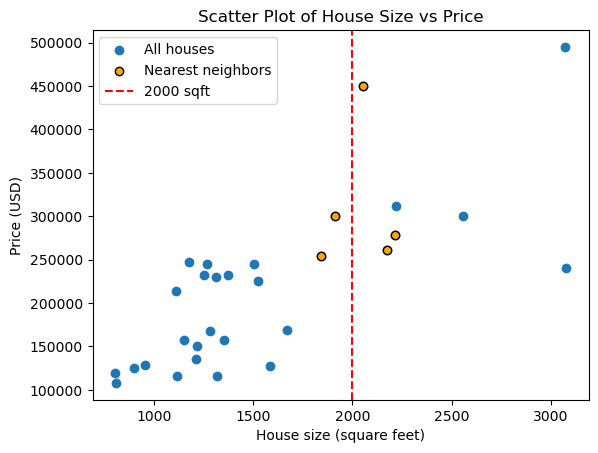

In [14]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [15]:
prediction = nearest_neighbors['price'].mean()
prediction

308740.0

In [16]:
sacramento_train, sacramento_test = train_test_split(
    sacramento, train_size = 0.75, random_state = 42
)

In [25]:
#Split training data into response and predictor variables
X_train = sacramento_train[['sq__ft']]
y_train = sacramento_train['price']

#initialize knn regression model
knn_regression = KNeighborsRegressor()

#define parameter grid
param_grid = {
    'n_neighbors': range(1, 201, 3)
}

#initialize grid search
sacr_gridsearch = GridSearchCV(
    estimator = knn_regression,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_root_mean_squared_error' #could've also done 'r2'
)

#fit grid search to training data
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)},
             scoring='neg_root_mean_squared_error')

In [45]:
#retrieve and format cv results
results = pd.DataFrame(sacr_gridsearch.cv_results_)

#take the absolute of the mean test score
results['mean_test_score'] = results['mean_test_score'].abs()
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002902,0.001142,0.002654,0.000709,1,{'n_neighbors': 1},-112075.959498,-113997.393596,-117026.607659,-120574.497484,-98703.354492,112475.562546,7462.628569,67
1,0.001739,0.000623,0.001675,0.000187,4,{'n_neighbors': 4},-87544.667287,-83883.876555,-83913.469660,-104704.353254,-85027.749120,89014.823175,7957.008142,56
2,0.002210,0.000367,0.001930,0.000326,7,{'n_neighbors': 7},-86504.059436,-82825.683348,-76131.355307,-102065.903265,-79440.331044,85393.466480,9022.456430,35
3,0.001821,0.000199,0.001582,0.000468,10,{'n_neighbors': 10},-84090.805474,-82910.735403,-78152.835102,-102051.387567,-74177.616156,84276.675940,9563.818797,27
4,0.001432,0.000373,0.001945,0.000507,13,{'n_neighbors': 13},-84904.213103,-81367.275879,-79773.776612,-100931.021005,-75241.782711,84443.613862,8808.991745,29


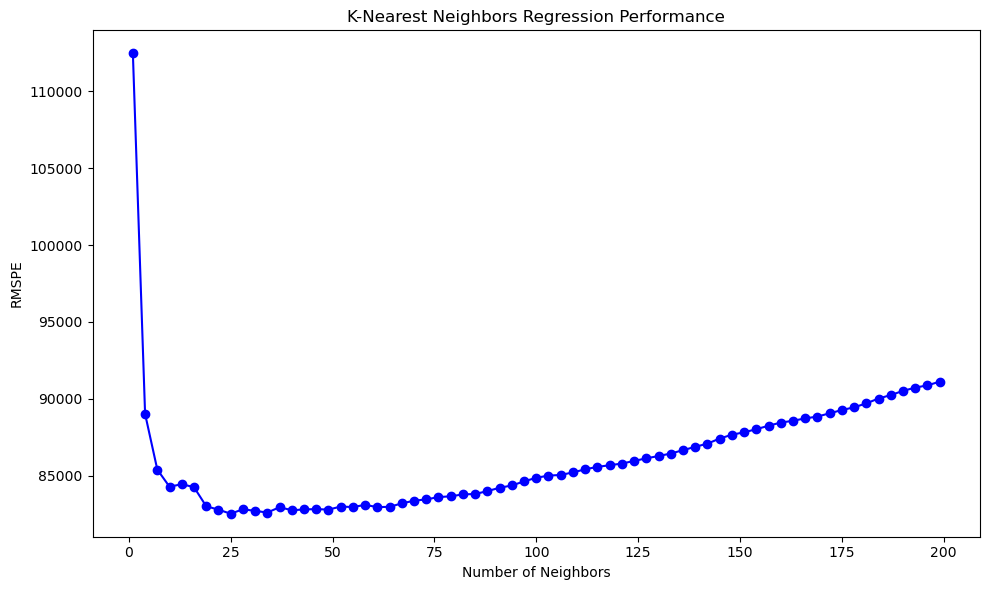

In [30]:
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSPE')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [34]:
sacr_gridsearch.best_params_

{'n_neighbors': 25}

In [35]:
#gridsearch with r2 scoring system
sacr_gridsearch2 = GridSearchCV(
    estimator = knn_regression,
    param_grid = param_grid,
    cv = 5,
    scoring = 'r2'
)
sacr_gridsearch2.fit(X_train, y_train)
results_r2 = pd.DataFrame(sacr_gridsearch2.cv_results_)
results_r2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003230,0.000448,0.003999,0.001051,1,{'n_neighbors': 1},0.113436,0.060582,0.042756,0.014593,0.158490,0.077972,0.051576,67
1,0.003268,0.000623,0.002691,0.000722,4,{'n_neighbors': 4},0.459065,0.491342,0.507828,0.256923,0.375522,0.418136,0.092612,58
2,0.001726,0.000928,0.002290,0.000877,7,{'n_neighbors': 7},0.471849,0.504095,0.594883,0.293900,0.454898,0.463925,0.097792,38
3,0.001942,0.000384,0.002644,0.000538,10,{'n_neighbors': 10},0.500906,0.503076,0.573084,0.294101,0.524729,0.479179,0.096114,28
4,0.001900,0.000781,0.002361,0.000254,13,{'n_neighbors': 13},0.491204,0.521405,0.555191,0.309515,0.510995,0.477662,0.086593,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.001762,0.000483,0.003812,0.000875,187,{'n_neighbors': 187},0.394130,0.428828,0.433780,0.296950,0.476894,0.406116,0.060583,62
63,0.001800,0.000465,0.004560,0.000407,190,{'n_neighbors': 190},0.390925,0.424235,0.430193,0.293643,0.473725,0.402544,0.060491,63
64,0.001548,0.000311,0.003908,0.000271,193,{'n_neighbors': 193},0.389446,0.419722,0.426369,0.292196,0.471203,0.399787,0.059812,64
65,0.001904,0.000358,0.003674,0.000534,196,{'n_neighbors': 196},0.387080,0.417233,0.424175,0.291467,0.469157,0.397823,0.059307,65


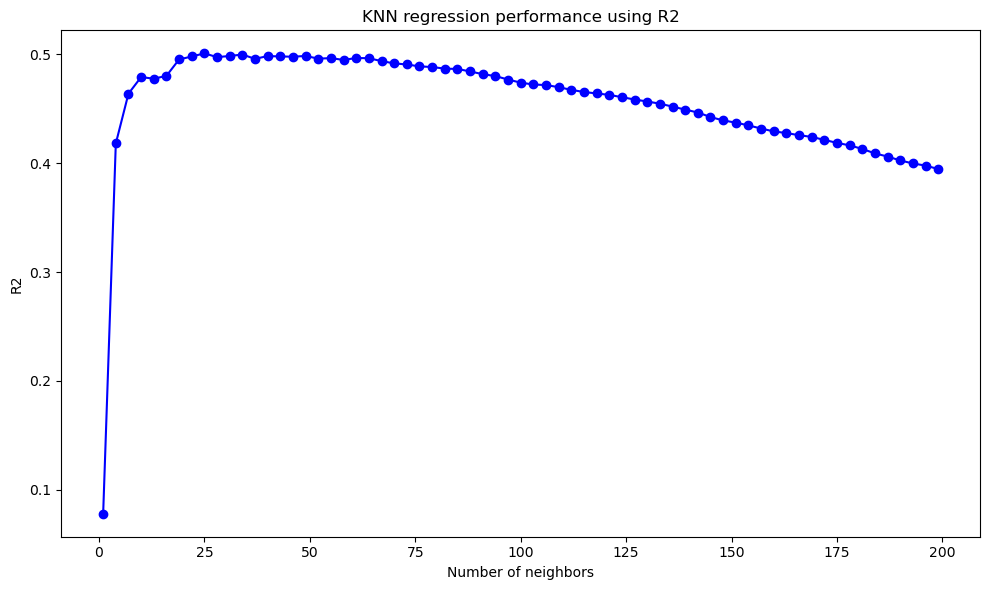

In [36]:
plt.figure(figsize =(10,6))
plt.plot(results_r2['param_n_neighbors'], results_r2['mean_test_score'],
         '-o', color = "blue")

#add labels and legends
plt.xlabel("Number of neighbors")
plt.ylabel("R2")
plt.title("KNN regression performance using R2")
plt.tight_layout()
plt.show()

In [37]:
sacr_gridsearch2.best_params_

{'n_neighbors': 25}

In [39]:
sacramento_test['predicted'] = sacr_gridsearch.predict(sacramento_test[['sq__ft']])

rmspe = mean_squared_error(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test['predicted']
)**0.5
rmspe

93573.27378694214

In [40]:
r2 = r2_score(
    y_true = sacramento_test['price'],
    y_pred = sacramento_test['predicted']
)
r2

0.4515467617395792

c:\Users\m293w\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


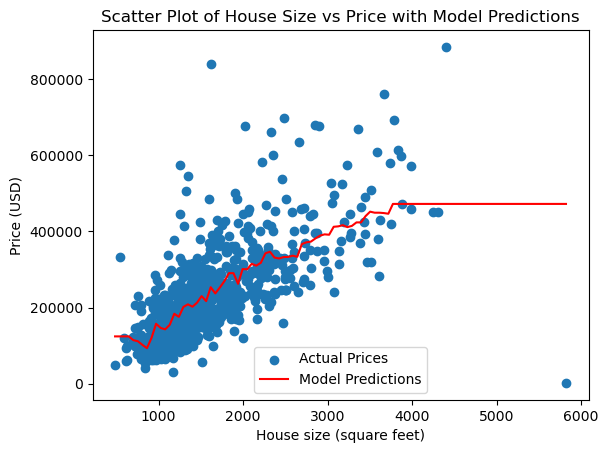

In [41]:
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show();

In [42]:
sacr_gridsearch2.predict([[10000]])

c:\Users\m293w\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([472300.76])

In [43]:
import math

In [44]:
def rmspe(y_true, y_pred):
    n = len(y_true)
    squared_errors = []
    for i in range(n):
        error = y_true[i] - y_pred[i]
        squared_errors.append(error**2)
    mean_squared_error = sum(squared_errors)/n
    math.sqrt(mean_squared_error)
    return mean_squared_error